# Explore here

In [ ]:
import os
from dotenv import load_dotenv

import pandas as pd
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)




In [4]:
artist_name = "Morat" 
search = sp.search(q=f"artist:{artist_name}", type="artist", limit=1)
items = search["artists"]["items"]
if not items:
    raise ValueError(f"No se encontró el artista: {artist_name}")

artist_id = items[0]["id"]
artist_found = items[0]["name"]
artist_id, artist_found


('5C4PDR4LnhZTbVnKWXuDKD', 'Morat')

In [ ]:
top = sp.artist_top_tracks(artist_id, country="US")

rows = []
for t in top["tracks"][:10]:
    rows.append({
        "track_id": t["id"],
        "track_name": t["name"],
        "popularity": t["popularity"],       
        "duration_ms": t["duration_ms"]
    })

df = pd.DataFrame(rows)
df["duration_min"] = df["duration_ms"] / (1000*60)
df.insert(0, "artist_name", artist_found)
df


,artist_name,track_id,track_name,popularity,duration_ms,duration_min
0,Morat,71iAechwVKGu26pahzFL0k,Cuando Nadie Ve,78,219586,3.659767
1,Morat,1mlGScrDQqHqmhdIqE8MmA,Besos En Guerra,78,231532,3.858867
2,Morat,4khWEpnaijN0G1x019Uzdr,No Se Va,77,216752,3.612533
3,Morat,7M6CFruBrM5x7u0lTMtm6r,Cómo Te Atreves,76,240560,4.009333
4,Morat,21t07fSxEHAjazqclabTEJ,A Dónde Vamos,73,204608,3.410133
5,Morat,2XA5q5FBwqrlkGBzzOOVeK,Porfa no te vayas,73,209712,3.495200
6,Morat,4vT124ymmEAfre47gVCcRI,LOS DOS,74,214735,3.578917
7,Morat,68k7kpYFI8CJUoNFGxWpjG,Me Toca A Mí,70,180340,3.005667
8,Morat,3zNcn4BaVfKORyx3uDfruW,Aprender A Quererte,74,229213,3.820217
9,Morat,2V4hc5gplg7EXlrRUvD4rp,Presiento,73,174379,2.906317


In [6]:
df_sorted = df.sort_values("popularity", ascending=True)
df_sorted.head(3)

,artist_name,track_id,track_name,popularity,duration_ms,duration_min
7,Morat,68k7kpYFI8CJUoNFGxWpjG,Me Toca A Mí,70,180340,3.005667
4,Morat,21t07fSxEHAjazqclabTEJ,A Dónde Vamos,73,204608,3.410133
5,Morat,2XA5q5FBwqrlkGBzzOOVeK,Porfa no te vayas,73,209712,3.495200


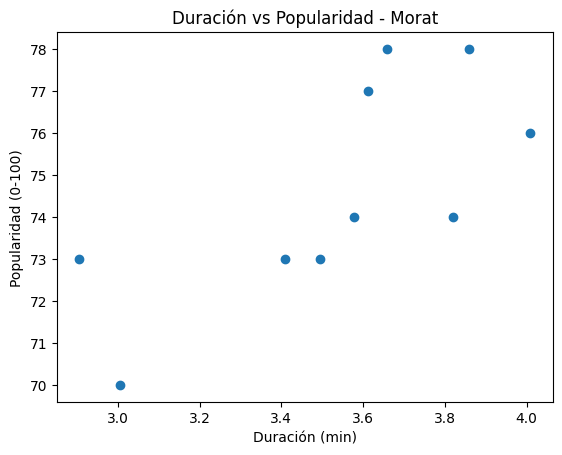

In [7]:
plt.figure()
plt.scatter(df["duration_min"], df["popularity"])
plt.xlabel("Duración (min)")
plt.ylabel("Popularidad (0-100)")
plt.title(f"Duración vs Popularidad - {artist_found}")
plt.show()

In [8]:
import os, sqlite3

os.makedirs("db", exist_ok=True)

conn = sqlite3.connect("db/spotify.db")
df.to_sql("artist_top_tracks", conn, if_exists="replace", index=False)

pd.read_sql("SELECT artist_name, track_name, popularity, duration_min FROM artist_top_tracks LIMIT 5;", conn)


,artist_name,track_name,popularity,duration_min
0,Morat,Cuando Nadie Ve,78,3.659767
1,Morat,Besos En Guerra,78,3.858867
2,Morat,No Se Va,77,3.612533
3,Morat,Cómo Te Atreves,76,4.009333
4,Morat,A Dónde Vamos,73,3.410133
